# Pokemon Stats

Plotting the pokemon win ratio vs the total base stats with the sprites!

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from copy import copy

In [2]:
def imscatter(x, y, image_path, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()

    image = plt.imread(image_path)

    im = OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(
        x, y
    )  # sets scalar arrays to at least 1d, preserves higher dim
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords="data", frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(
        np.column_stack([x, y])
    )  # ???? What is column_stack and update datalim
    ax.autoscale()
    return artists

## Load Data

In [3]:
import pickle

with open("poke_fight_results.pkl", "rb") as f:
    poke_dict = pickle.load(f)

In [5]:
# Test with the obligatory snorlax
poke_dict["weedle"]

{'tier': 'F',
 'type': ['Bug', 'Poison'],
 'stats': {'hp': 40, 'atk': 35, 'def': 30, 'spa': 20, 'spd': 20, 'spe': 50},
 'base_stat_total': 195,
 'average_win_ratio': 0.9403973509933775}

Remember to put the win ratio stats into the data as 'avg_win_ratio'

## Plotting Functions

In [6]:
# Poke plotter
# Plot with images from pokemon_dict
def poke_plotter_duel(p_dict: dict, ax=None, zoom=0.5):
    if ax is None:
        ax = plt.gca()
    # im = OffsetImage(image, zoom=zoom)
    # x, y = np.atleast_1d(x, y) # sets scalar arrays to at least 1d, preserves higher dim

    artists = []
    x = []
    y = []
    for pokemon in p_dict.keys():
        # print(pokemon)
        total_base_stat = p_dict[pokemon]["base_stat_total"]
        average_win_ratio = 1 - p_dict[pokemon]["average_win_ratio"]
        x.append(total_base_stat)
        y.append(average_win_ratio)
        img = plt.imread(f"sprites/{pokemon}.png")
        img = OffsetImage(img, zoom=zoom)
        ab = AnnotationBbox(
            img, (total_base_stat, average_win_ratio), xycoords="data", frameon=False
        )
        artists.append(ax.add_artist(ab))
    ax.update_datalim(
        np.column_stack([x, y])
    )  # ???? What is column_stack and update datalim
    ax.autoscale()
    ax.set_title('1v1 Thunderdome Results')
    ax.set_xlabel('Total Base Stats')
    ax.set_ylabel('Average Win Ratio')
    # return artists

## Test Plotting

Spoof some numbers, test the plotter

In [98]:
t_dict = {}
t_dict["snorlax"] = poke_dict["snorlax"]
t_dict["snorlax"]["average_win_ratio"] = 0.75

In [99]:
t_dict

{'snorlax': {'tier': ['OU'],
  'type': ['Normal'],
  'stats': {'hp': 160, 'atk': 110, 'def': 65, 'spa': 65, 'spd': 65, 'spe': 30},
  'base_stat_total': 495,
  'average_win_ratio': 0.75}}

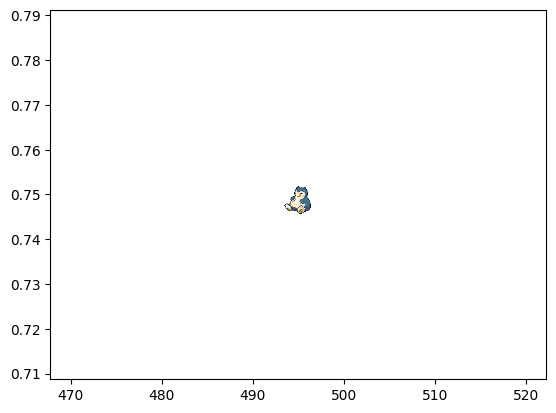

In [100]:
poke_plotter_duel(t_dict)

In [101]:
average_wins = np.random.normal(0, 1, 151)

In [102]:
t_poke_dict = copy(poke_dict)

In [103]:
for i in range(151):
    t_poke_dict[list(t_poke_dict.keys())[i]]["average_win_ratio"] = average_wins[i]

In [104]:
t_poke_dict["kingler"]

{'tier': ['NU'],
 'type': ['Water'],
 'stats': {'hp': 55, 'atk': 130, 'def': 115, 'spa': 50, 'spd': 50, 'spe': 75},
 'base_stat_total': 475,
 'average_win_ratio': 0.41420956171566686}

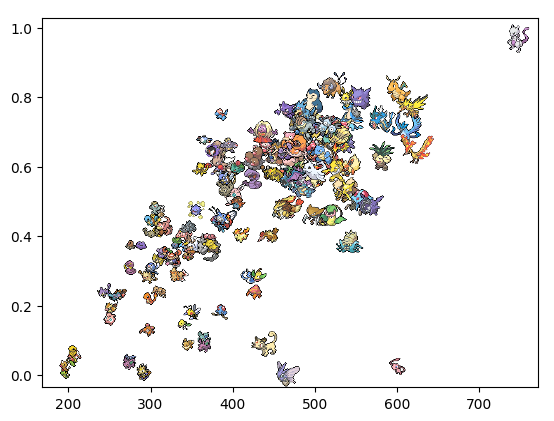

In [7]:
poke_plotter_duel(poke_dict)

In [57]:
import os

In [59]:
len(os.listdir("sprites"))

150